#### Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [148]:
# Loading the dataset
df = pd.read_csv(r"C:\Users\admin\Desktop\Python basis\Eve\Telecom_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The column customerid has been remove due to no any changing in our dataset

In [150]:
df = df.drop('customerID',axis=1)

In [151]:
# checking shape of dataset
df.shape

(7043, 20)

In the dataset 4043 rows and 20 columns

In [153]:
# checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


float64(1), int64(2), object(17)

In [154]:
# Now replaceing 'Churn' categorical data in to integ.
df.Churn.replace(('Yes', 'No'), (1, 0), inplace=True)

In [155]:
df['MultipleLines'].replace('No phone service', value='No', inplace=True)

In [156]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [157]:
Churn = df.groupby('Churn')
Churn.mean()

,SeniorCitizen,tenure,MonthlyCharges
Churn,,,
0,0.128721,37.569965,61.265124
1,0.254682,17.979133,74.441332


#### Checking Data types of the Data set

In [158]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [159]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [160]:
# Checking for null values
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Total charges having missing value.rest are no any missing value

In [161]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

In [162]:
#Now again checking missing value
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Now There is no any missing value in our dataset

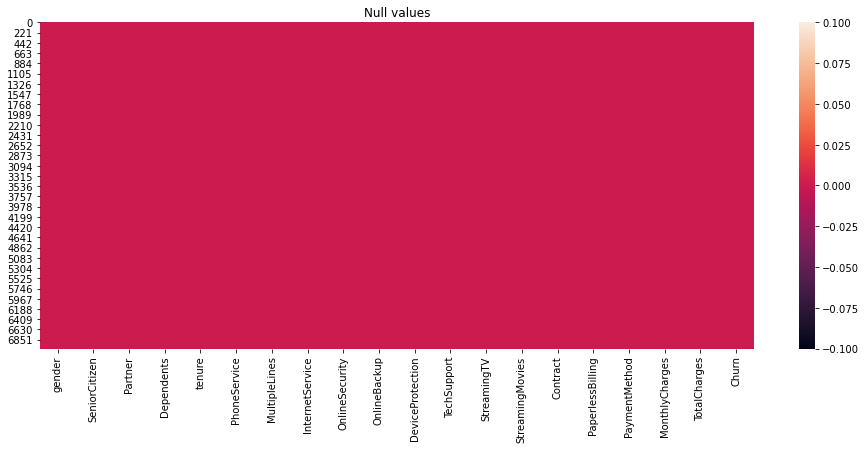

In [187]:
plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

There is no any missing value in our dataset

#### Data Visualisation

In [163]:
categorical_var = list(df.dtypes.loc[df.dtypes == 'object'].index)
print(len(categorical_var))
print(categorical_var)

15
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [164]:
continuous_var = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']

#### Employed churn

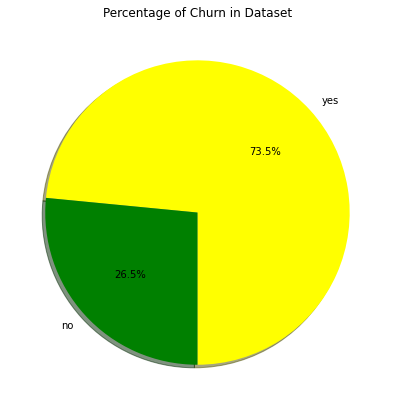

In [165]:
sizes = df['Churn'].value_counts(sort = True)
colors = ["yellow","green"]
labels = ["yes","no"]
plt.figure(figsize=(7,7))
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

In above dig shown 73.5% Chrun data avail and 26.5% not avail.

In [166]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

Dataset is not balanced

#### Checking correlation

                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.016567        0.220173      0.102395
tenure               0.016567  1.000000        0.247900      0.824757
MonthlyCharges       0.220173  0.247900        1.000000      0.650468
TotalCharges         0.102395  0.824757        0.650468      1.000000


<AxesSubplot:>

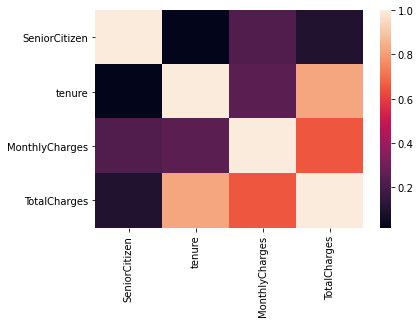

In [167]:
corr = df[continuous_var].corr()
print(corr)
sns.heatmap(corr)

We can say that the variable TotalCharges and tenure are highly positively correlated.

Employment Contract

In [168]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

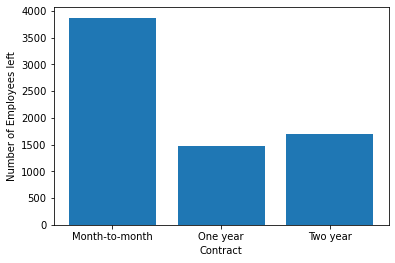

In [169]:
cont=df.groupby('Contract').count()
plt.bar(cont.index.values, cont['Churn'])
plt.xlabel('Contract')
plt.ylabel('Number of Employees left')
plt.show()

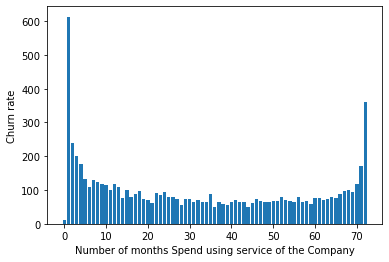

In [170]:
tenure=df.groupby('tenure').count()
plt.bar(tenure.index.values, tenure['Churn'])
plt.xlabel('Number of months Spend using service of the Company')
plt.ylabel('Churn rate')
plt.show()

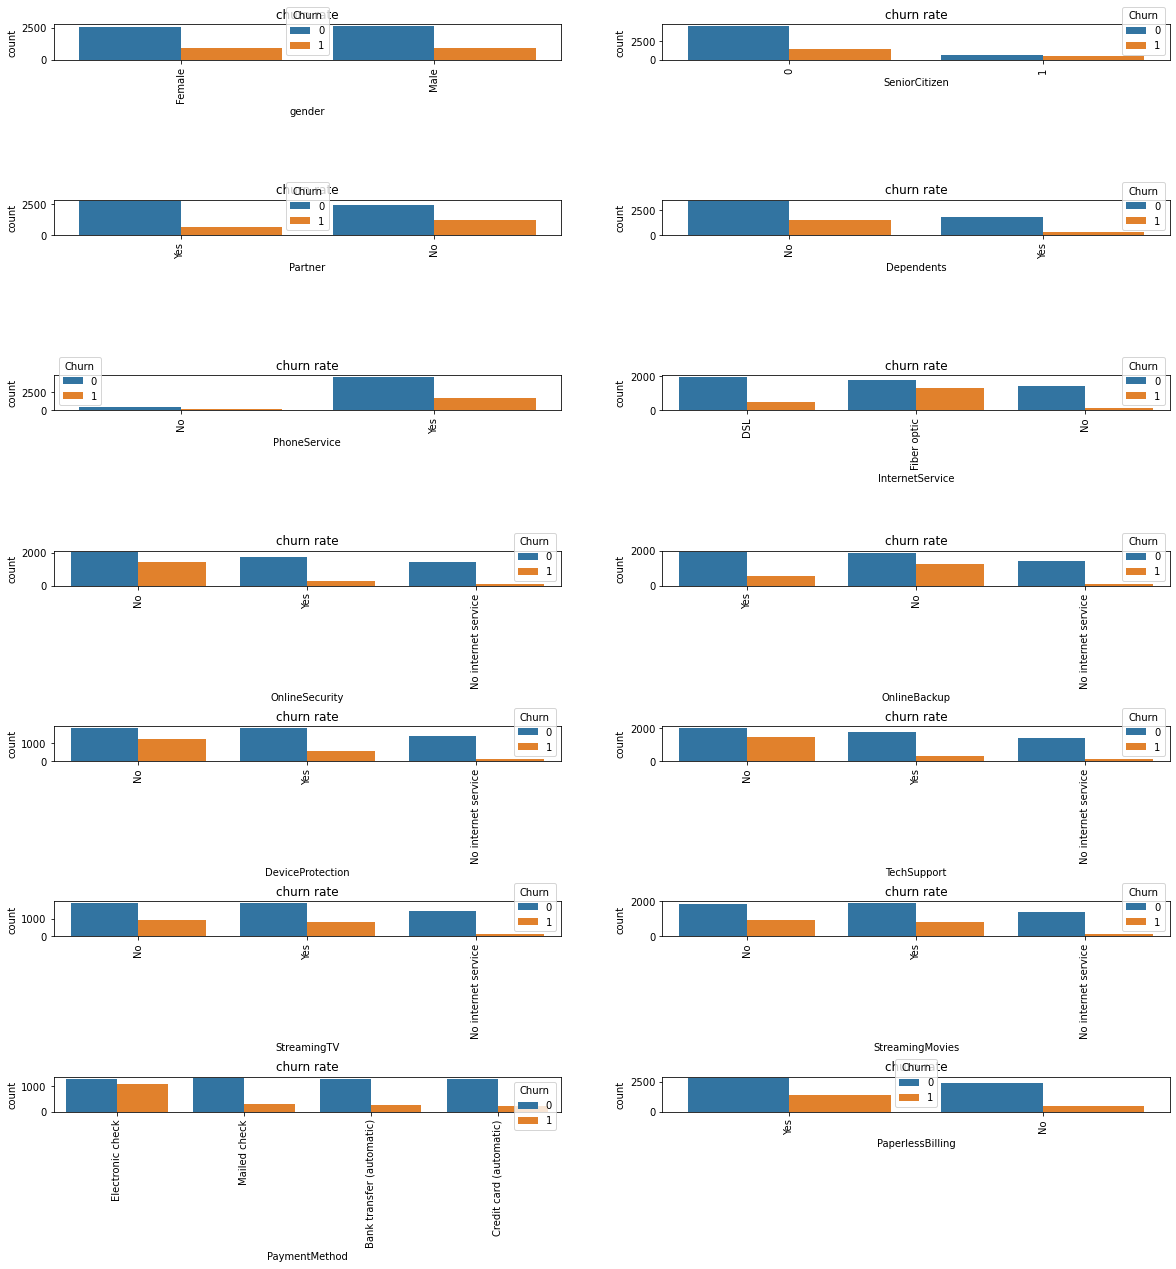

In [171]:
features=['gender','SeniorCitizen','Partner','Dependents','PhoneService', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaymentMethod','PaperlessBilling']
fig=plt.subplots(figsize=(20,20))
for i, j in enumerate(features):
    plt.subplot(7, 2, i+1)
    plt.subplots_adjust(hspace = 4)
    sns.countplot(x=j,data = df, hue= 'Churn')
    plt.xticks(rotation=90)
    plt.title("churn rate")

In [172]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
features=['gender','SeniorCitizen','Partner','Dependents', 'PhoneService','MultipleLines', 'PaperlessBilling',
          'InternetService','OnlineSecurity','OnlineBackup',
          'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaymentMethod','Contract','MonthlyCharges','TotalCharges']
for i, j in enumerate(features):
  df[j]=le.fit_transform(df[j])
df['Churn']=le.fit_transform(df['Churn'])

#### Training the Dataset

In [173]:
x=df.drop(['Churn','gender','StreamingTV','StreamingMovies'],axis=1)
y=df['Churn']

In [174]:
x

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,1,0,0,0,0,2,0,0,0,1,2,142,74
1,0,0,0,34,1,0,0,2,0,2,0,1,0,3,498,3624
2,0,0,0,2,1,0,0,2,2,0,0,0,1,3,436,536
3,0,0,0,45,0,0,0,2,0,2,2,1,0,0,266,3570
4,0,0,0,2,1,0,1,0,0,0,0,0,1,2,729,674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,0,2,0,2,2,1,1,3,991,3700
7039,0,1,1,72,1,1,1,0,2,2,0,1,1,1,1340,6305
7040,0,1,1,11,0,0,0,2,0,0,0,0,1,2,137,1265
7041,1,1,0,4,1,1,1,0,0,0,0,0,1,3,795,1157


In [175]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

#### Model Building

In [176]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [177]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS = i
        
print("Best accuracy is",maxAccu,"on Random_state",maxRS)
    

Best accuracy is 0.824420255560814 on Random_state 129


We have found best random_state value as 129 .we will create our train_test split this random_state(129)

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8002839564600095
[[1397  158]
 [ 264  294]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1555
           1       0.65      0.53      0.58       558

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



In [179]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
predlr = dt.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7316611452910554
[[1260  295]
 [ 272  286]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1555
           1       0.49      0.51      0.50       558

    accuracy                           0.73      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.74      0.73      0.73      2113



In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predlr = rf.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7846663511594889
[[1374  181]
 [ 274  284]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1555
           1       0.61      0.51      0.56       558

    accuracy                           0.78      2113
   macro avg       0.72      0.70      0.71      2113
weighted avg       0.77      0.78      0.78      2113



In [181]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
svc = SVC()
svc.fit(x_train,y_train)
predlr = svc.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7770941788925698
[[1466   89]
 [ 382  176]]
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1555
           1       0.66      0.32      0.43       558

    accuracy                           0.78      2113
   macro avg       0.73      0.63      0.64      2113
weighted avg       0.76      0.78      0.75      2113



We are getting highest accuracy with Logistic Regression(80%)but it can due to overfitting also so we will check cross validation scores.

In [182]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR,x,y,cv=5)

print("Cross validation score of LogisticRegression model :",scr.mean())

Cross validation score of LogisticRegression model : 0.8037770581973029


In [183]:
scr = cross_val_score(dt,x,y,cv=5)

print("Cross validation score of DecisionTree model :",scr.mean())

Cross validation score of DecisionTree model : 0.732783062616943


In [184]:
scr = cross_val_score(rf,x,y,cv=5)

print("Cross validation score of RandomForest model :",scr.mean())

Cross validation score of RandomForest model : 0.7887278009871606


In [185]:
scr = cross_val_score(svc,x,y,cv=5)

print("Cross validation score of SVC model :",scr.mean())

Cross validation score of SVC model : 0.7839002717917285


Minimum diffrence in accuracy and cross validation score is for RandomForestClassifier so this is our best model.

#### Hyper parameter tuning

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
# RandomForestClassifier

parameters = {'n_estimators':[200,700],
             'max_features':['auto','sqrt','log2'],
             'max_depth': [4,5,6,7,8],
             'criterion': ['gini','entropy']}

In [102]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [103]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [104]:
GCV.best_params_ # printing the best parameter found by GridSearchCV

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [105]:
mod = RandomForestClassifier(criterion='gini',max_features='log2',max_depth=8,n_estimators=200)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)

print(accuracy_score(y_test,pred)*100)

79.36583057264552


#### Saving the model

In [186]:
import joblib
joblib.dump(mod,'customer churn Analysis')

['customer churn Analysis']